In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
import urllib.request
import re

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
html_doc = "https://h1bdata.info/index.php?em=&job=Data+Scientist&city=&year=All+Years"
try:
    page = urllib.request.urlopen(html_doc)
except:
    print("An error occured.")

In [3]:
soup = BeautifulSoup(page, 'html.parser')

In [4]:
soup.title

<title>Data scientist Salary</title>

In [112]:
soup.title.name

'title'

In [6]:
soup.title.string


'Data scientist Salary'

In [7]:
soup.p

<p>Trending now:
<a href="index.php?em=Facebook&amp;year=2019">Facebook</a>, <a href="index.php?em=amazon&amp;year=2019">Amazon</a>, <a href="index.php?em=apple&amp;year=2019">Apple</a>,
<a href="index.php?em=netflix&amp;year=2019">Netflix</a>, <a href="index.php?em=google&amp;year=2019">Google</a>, <a href="index.php?em=airbnb&amp;year=2019">Airbnb</a>,
<a href="index.php?em=uber&amp;year=2019">Uber</a>, <a href="index.php?em=linkedin&amp;year=2019">Linkedin</a>, <a href="index.php?em=salesforce&amp;year=2019">Salesforce</a>
</p>

In [8]:
soup.a

<a class="navbar-brand" href="index.php">H1B Salary Database</a>

In [9]:
soup.find_all('a')

[<a class="navbar-brand" href="index.php">H1B Salary Database</a>,
 <a class="dropdown-toggle" data-toggle="dropdown" href="#">Companies<b class="caret"></b></a>,
 <a href="index.php?em=Google&amp;year=2019">Google</a>,
 <a href="index.php?em=Yahoo&amp;year=2019">Yahoo</a>,
 <a href="index.php?em=Facebook&amp;year=2019">Facebook</a>,
 <a href="index.php?em=Apple+inc&amp;year=2019">Apple</a>,
 <a href="index.php?em=Linkedin&amp;year=2019">Linkedin</a>,
 <a href="index.php?em=Twitter&amp;year=2019">Twitter</a>,
 <a href="index.php?em=Amazon&amp;year=2019">Amazon</a>,
 <a href="index.php?em=Microsoft&amp;year=2019">Microsoft</a>,
 <a href="index.php?em=Uber&amp;year=2019">Uber</a>,
 <a href="index.php?em=Airbnb&amp;year=2019">Airbnb</a>,
 <a href="topcompanies.php">More...</a>,
 <a class="dropdown-toggle" data-toggle="dropdown" href="#">Job Titles<b class="caret"></b></a>,
 <a href="index.php?job=Accountant&amp;year=2019">Accountant</a>,
 <a href="index.php?job=Analyst&amp;year=2019">Anal

In [10]:
tables = soup.findChildren('table')
my_table = tables[0]
rows = my_table.findChildren(['tr'])

In [11]:
rows[0]

<tr><th>EMPLOYER</th><th>JOB TITLE</th><th>BASE SALARY</th><th>LOCATION</th><th data-date-format="mm/dd/yy">SUBMIT DATE</th><th data-date-format="mm/dd/yy">START DATE</th><th>CASE STATUS</th></tr>

In [12]:
columns = []
for i in rows[0].findChildren(['th']):
    columns.append(i.string)

In [13]:
columns

['EMPLOYER',
 'JOB TITLE',
 'BASE SALARY',
 'LOCATION',
 'SUBMIT DATE',
 'START DATE',
 'CASE STATUS']

In [14]:
prim_text = []

for tr in rows[1:]:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    prim_text.append(row)

In [15]:
prim_text[:5]

[['PERCOLATA CORPORATION',
  'DATA SCIENTIST',
  '46,060',
  'PALO ALTO, CA',
  '03/18/2016',
  '09/02/2016',
  'CERTIFIED'],
 ['MY LIFE REGISTRY LLC',
  'DATA SCIENTIST',
  '47,960',
  'FORT LEE, NJ',
  '02/18/2015',
  '08/20/2015',
  'CERTIFIED'],
 ['MY LIFE REGISTRY LLC',
  'DATA SCIENTIST',
  '47,960',
  'FORT LEE, NJ',
  '02/18/2015',
  '08/20/2015',
  'CERTIFIED'],
 ['BIG DATA ANALYTICS TRADING INC',
  'DATA SCIENTIST',
  '50,000',
  'JOHNS CREEK, GA',
  '03/16/2017',
  '09/01/2017',
  'CERTIFIED'],
 ['YONO HEALTH INC',
  'DATA SCIENTIST',
  '50,220',
  'SUNNYVALE, CA',
  '02/28/2017',
  '08/28/2017',
  'CERTIFIED']]

In [89]:
data_scientists = pd.DataFrame(prim_text, columns=columns)

In [94]:
data_scientists

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,PERCOLATA CORPORATION,DATA SCIENTIST,46060,"PALO ALTO, CA",03/18/2016,09/02/2016,CERTIFIED
1,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960,"FORT LEE, NJ",02/18/2015,08/20/2015,CERTIFIED
2,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960,"FORT LEE, NJ",02/18/2015,08/20/2015,CERTIFIED
3,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000,"JOHNS CREEK, GA",03/16/2017,09/01/2017,CERTIFIED
4,YONO HEALTH INC,DATA SCIENTIST,50220,"SUNNYVALE, CA",02/28/2017,08/28/2017,CERTIFIED
5,OPEN DATA GROUP INC,DATA SCIENTIST,51860,"CHICAGO, ILLINOIS",02/28/2019,08/21/2019,CERTIFIED
6,SRIVEN SYSTEMS OF TX INC,DATA SCIENTIST,52000,"MADISON, WI",03/07/2018,09/02/2018,CERTIFIED
7,NECTO-NET CONTACT MANAGEMENT INC,DATA SCIENTIST,52300,"HOUSTON, TX",03/16/2017,09/02/2017,CERTIFIED
8,THE BALMORAL GROUP LLC,DATA SCIENTIST,58920,"WINTER PARK, FL",03/21/2018,09/20/2018,CERTIFIED
9,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,59340,"BOSTON, MASSACHUSETTS",03/12/2019,09/06/2019,CERTIFIED


In [93]:
data_scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075 entries, 0 to 7074
Data columns (total 7 columns):
EMPLOYER       7075 non-null object
JOB TITLE      7075 non-null object
BASE SALARY    7075 non-null int32
LOCATION       7075 non-null object
SUBMIT DATE    7075 non-null object
START DATE     7075 non-null object
CASE STATUS    7075 non-null object
dtypes: int32(1), object(6)
memory usage: 359.4+ KB


In [92]:
data_scientists['BASE SALARY'] =  data_scientists['BASE SALARY'].str.replace(',', '')
data_scientists['BASE SALARY'] = data_scientists['BASE SALARY'].astype(str).astype(int)

In [106]:
data_scientists_norm = data_scientists[data_scientists['BASE SALARY'] < 300000]

Text(0, 0.5, 'Frequency')

<Figure size 720x720 with 0 Axes>

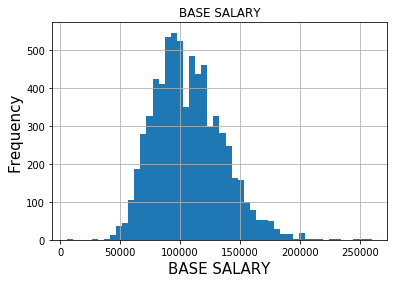

In [108]:
fig=plt.figure(figsize=(10,10))
data_scientists_norm.hist(column='BASE SALARY', bins=50)
plt.xlabel("BASE SALARY",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

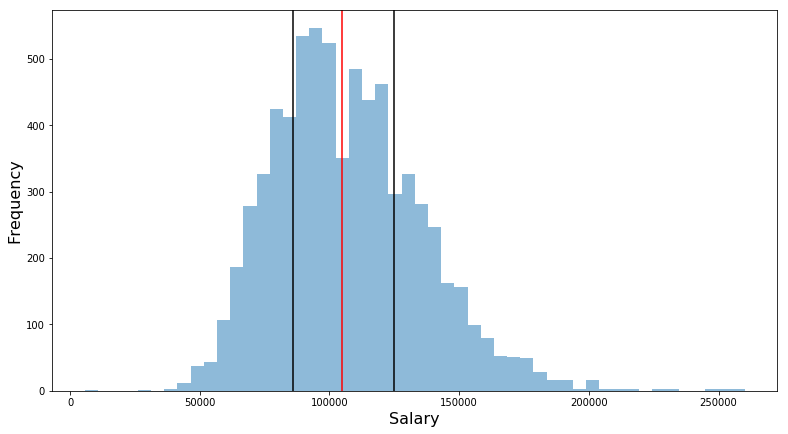

In [111]:
fig, ax = plt.subplots(figsize=(13,7))
ax = plt.hist(data_scientists_norm['BASE SALARY'], bins=50, alpha=0.5)
plt.axvline(data_scientists_norm['BASE SALARY'].quantile(0.25), c='black')
plt.axvline(data_scientists_norm['BASE SALARY'].quantile(0.50), c='red')
plt.axvline(data_scientists_norm['BASE SALARY'].quantile(0.75), c='black')

plt.xlabel('Salary',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.savefig(fname='salary_hist', dpi=150)
plt.show()